# The Spark Foundation - GRIP

# To explore supervised Machine Learning

TASK - what will be the predicted score if a student study for 9.25 hours in a day ?

In [1]:
#importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the CSV file
df = pd.read_csv(r"http://bit.ly/w-data")

# Data Analysis

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.describe() #describing the data

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
df.shape

(25, 2)

In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Visualising data

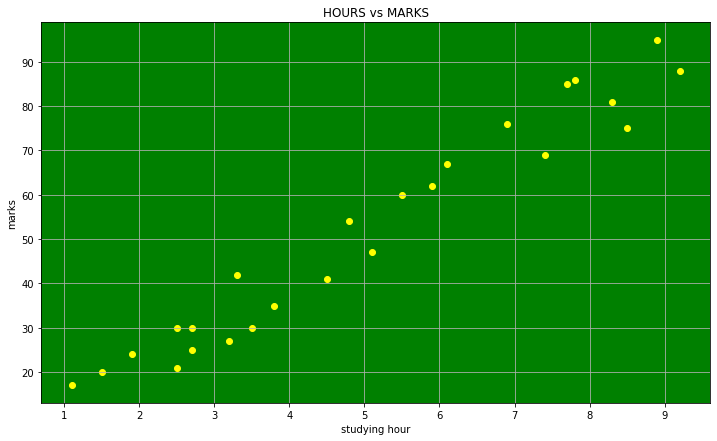

In [30]:
#Plotting the graph
#x-axis - hours 
#y-axis - marks
plt.figure(figsize=(12,7))
plt.scatter(x=df.Hours , y=df.Scores , color="#FFFF00")
plt.title("HOURS vs MARKS")
plt.xlabel("studying hour")
plt.ylabel("marks")
plt.grid()
plt.rcParams['axes.facecolor']= 'green'
plt.show()

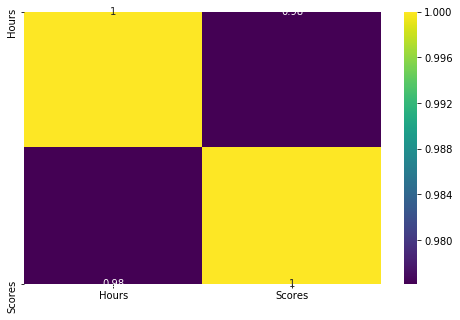

 98% corelation between Hours and Scores


In [38]:
#To find the corelation between the number of hours studied and scores obtained
relation = df.corr()
fig, ax = plt.subplots(figsize = (8,5))
sns.heatmap(relation, annot=True, cmap='viridis' , ax=ax )
plt.show()
print(' 98% corelation between Hours and Scores')

## prepare the data for ML algorithm

In [9]:
df.isnull().sum() #data cleaning

Hours     0
Scores    0
dtype: int64

Use of .isnull() function to find null values in data frame here, True = Null and False = Not Null 

In [10]:
df.mean()

Hours      5.012
Scores    51.480
dtype: float64

In [11]:
df2 = df.fillna(df.mean())

In [12]:
df2.head() #cleaned dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [13]:
#spliting dataset for training and testing

In [14]:
X=df2[['Hours']]
y=df2['Scores']

In [15]:
from sklearn.model_selection import train_test_split
X_train ,  X_test, y_train , y_test = train_test_split(X,y, test_size = 0.2 , random_state = 0)

In [16]:
print("Shape of X_train =" , X_train.shape)
print("Shape of y_train =" , y_train.shape)
print("Shape of X_test =" , X_test.shape)
print("Shape of y_test =" , y_test.shape)

Shape of X_train = (20, 1)
Shape of y_train = (20,)
Shape of X_test = (5, 1)
Shape of y_test = (5,)


## select a model and train it

In [17]:
#Using Linear Regression Algorithm to train the model

from sklearn.linear_model import LinearRegression
from sklearn import metrics
lr = LinearRegression()

In [18]:
lr.fit(X_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

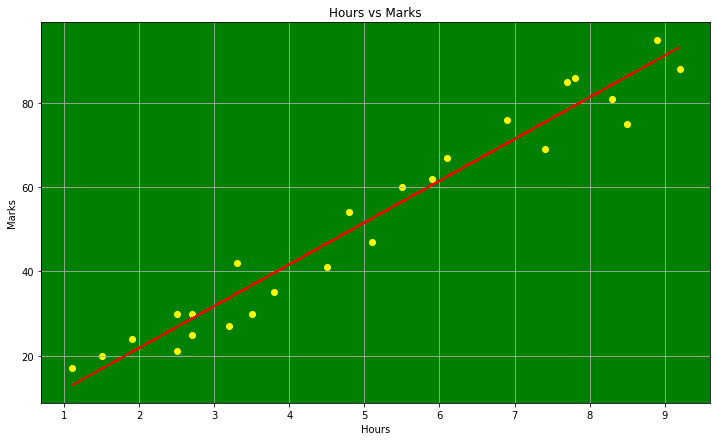

In [19]:
# Plotting the Linear regression line
line = lr.coef_ * X + lr.intercept_

# Plotting for the test data
plt.figure(figsize=(12,7))
plt.rcParams['axes.facecolor'] = 'green'
plt.scatter(X, y,color ='#FFFF00')
plt.plot(X, line, color='red')
plt.title('Hours vs Marks')
plt.xlabel('Hours')
plt.ylabel('Marks')
plt.grid()
plt.show()

y = mx + c
Plotting the Linear Regression line for test data

In [20]:
# y = mx + c
#here 'm' is the cofficient and 'c' is the intercept
#getting the value of m
lr.coef_

array([9.91065648])

In [21]:
#getting the value of c
lr.intercept_

2.018160041434683

In [22]:
y_pred = lr.predict(X_test)

In [23]:
y_pred.round(2)

array([16.88, 33.73, 75.36, 26.79, 60.49])

In [24]:
# Comparing Actual vs Predicted values
pd.DataFrame(np.c_[X_test , y_test , y_pred] , columns = ["Study_hours" , "Marks_original" , "Marks_predicted"])

,Study_hours,Marks_original,Marks_predicted
0,1.5,20.0,16.884145
1,3.2,27.0,33.732261
2,7.4,69.0,75.357018
3,2.5,30.0,26.794801
4,5.9,62.0,60.491033


# Fine tune model

In [25]:
# Calculating the mean absolute error and mean absolute error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print('mean squared error: ', mean_squared_error(y_test,y_pred))
print('mean absolute error: ', mean_absolute_error(y_test,y_pred))

mean squared error:  21.5987693072174
mean absolute error:  4.183859899002975


In [26]:
lr.score(X_test , y_test) #accuracy check

0.9454906892105356

this shows our model is 94 % accurate

# Presenting the solution 

Saving ML MODEL

In [27]:
import joblib
joblib.dump(lr , "Student_Mark_Predictor.pkl")

['Student_Mark_Predictor.pkl']

In [28]:
model  = joblib.load("Student_Mark_Predictor.pkl")

# Predicting the result

In [33]:

hours = 9.25
hr=np.reshape(hours,(-1,1))
pred_1 = model.predict(hr)
print("Number of Hours = {}".format(hours))
print("Predicted Score = {:.2f} %".format(pred_1[0]))

Number of Hours = 9.25
Predicted Score = 93.69 %
